In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy  
import cartopy.feature as cfeature                     
import cartopy.crs as ccrs           
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import obspy as op
from obspy.clients.fdsn import Client
from obspy.imaging.beachball import beach
from matplotlib.animation import FuncAnimation

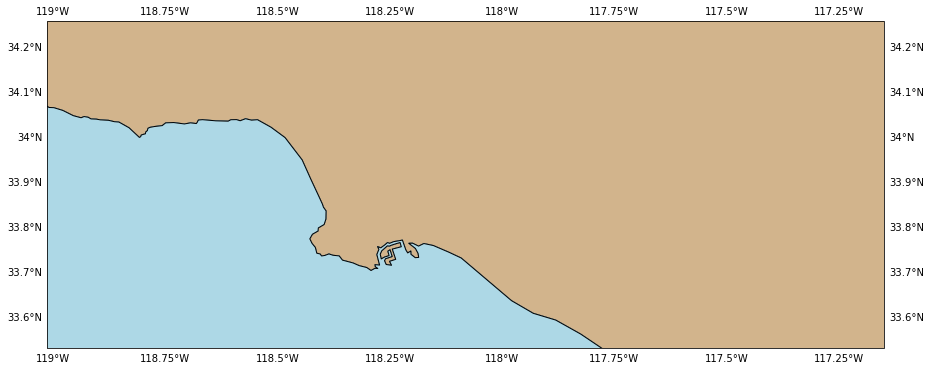

In [2]:
fig = plt.figure(1,figsize=(15,15))
m1 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
m1.set_ylim(33.531138,34.257829)                             
m1.set_xlim(-119.012151,-117.149002)
m1.add_feature(cfeature.LAND, edgecolor='black', facecolor='tan')
m1.add_feature(cfeature.OCEAN,facecolor='lightblue')
m1.add_feature(cfeature.COASTLINE)
m1.add_feature(cfeature.BORDERS, linestyle=':')
gl = m1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.top_xlabels = gl.right_ylabels = False 
gl.xformatter = LONGITUDE_FORMATTER                              # set cartopy formatting
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}                                   # change label font sizes
gl.ylabel_style = {'size': 10}

In [3]:
data = pd.read_csv('la_events.csv')

In [4]:
data.columns

Index(['time', 'latitude', 'longitude', 'StrikeNP1', 'DipNP1', 'RakeNP1',
       'StrikeNP2', 'DipNP2', 'RakeNP2', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [5]:
data.columns[1:5]

Index(['latitude', 'longitude', 'StrikeNP1', 'DipNP1'], dtype='object')

In [6]:
list_lat = []
list_lon = []
list_strike = []
list_dip = []
list_rake = []

for i in range(0, 1):
    for k in range(0,data.shape[0]):
        list_lat.append(data.iloc[k, 1])
        list_lon.append(data.iloc[k, 2])
        list_strike.append(data.iloc[k, 3])
        list_dip.append(data.iloc[k, 4])
        list_rake.append(data.iloc[k, 5])

In [7]:
data.head()

time   latitude   longitude  StrikeNP1  DipNP1  \
0  2020-01-09T09:20:57.510Z  34.001500 -118.180167        219      39   
1  2020-02-19T05:14:18.010Z  33.878167 -118.273000        313      81   
2  2020-03-08T22:22:44.550Z  33.891500 -118.269167        336      81   
3  2020-04-21T16:44:30.250Z  33.986667 -118.347500        256      74   
4  2020-04-22T07:03:47.740Z  33.989000 -118.349500        260      85   

   RakeNP1  StrikeNP2  DipNP2  RakeNP2  depth  ...                   updated  \
0       62         73      56      111  16.94  ...  2020-01-14T15:49:59.770Z   
1      168         45      78        9  15.09  ...  2020-02-21T10:03:09.280Z   
2     -174        245      84       -9   5.16  ...  2020-03-10T16:18:25.090Z   
3       12        163      78      164  11.39  ...  2020-04-23T06:19:47.191Z   
4        6        169      84      175  11.60  ...  2020-09-19T20:23:47.063Z   

                                  place        type  horizontalError  \
0                2km NNE of Maywood, CA  earthquake             0.24   
1                4km ESE of Gardena, CA  earthquake             0.23   
2            3km SSW of Willowbrook, CA  earthquake             0.30   
3  1km S of View Park-Windsor Hills, CA  earthquake             0.19   
4  1km S of View Park-Windsor Hills, CA  earthquake             0.12   

   depthError  magError magNst    status locationSource magSource  
0        0.40     0.185     59  reviewed             ci        ci  
1        0.37     0.157     85  reviewed             ci        ci  
2        0.63     0.190     29  reviewed             ci        ci  
3        0.27     0.157     73  reviewed             ci        ci  
4        0.20       NaN      4  reviewed             ci        ci  

[5 rows x 28 columns]

In [ ]:
lon_points = list_lon
lat_points = list_lat
def animate(i):
    lon_points2 = lon_points[0]
    lat_points2 = lat_points[0]
    lon_points.remove(lon_points[0])
    lat_points.remove(lat_points[0])
    m1.scatter(lon_points2, lat_points2, color = 'blue')

ani= FuncAnimation(fig, animate, 265, interval=200, repeat = False)
ani.save('event_locations.gif', writer='pillow')
plt.show()

In [8]:
lon_points = list_lon
lat_points = list_lat
strike_points = list_strike
dip_points = list_dip
rake_points = list_rake

def animate2(i):
        lon2 = lon_points[0]
        lat2 = lat_points[0]
        strike2 = strike_points[0]
        dip2 = dip_points[0]
        rake2 = rake_points[0]
        lon_points.remove(lon_points[0])
        lat_points.remove(lat_points[0])
        strike_points.remove(strike_points[0])
        dip_points.remove(dip_points[0])
        rake_points.remove(rake_points[0])
        bball = beach([strike2, dip2, rake2]   # build beachball as a collection
                        , xy=(lon2,lat2)            # where to plot beachball in the map
                        , width=(0.05,0.05)             # scale of the beachball in the (x,y) plane
                        , linewidth=1             # thickness of nodal planes and beachball edge lines
                        , facecolor='black')   # color of one of the axes
                      
        m1.add_collection(bball)
        
ani = FuncAnimation(fig, animate2, 265, interval=200, repeat = False)
ani.save('beachballs.mp4', writer='ffmpeg')
plt.show()

IndexError: list index out of range